              precision    recall  f1-score   support

           0       0.99      0.98      0.99      9031
           1       0.98      0.99      0.99      8803

    accuracy                           0.99     17834
   macro avg       0.99      0.99      0.99     17834
weighted avg       0.99      0.99      0.99     17834



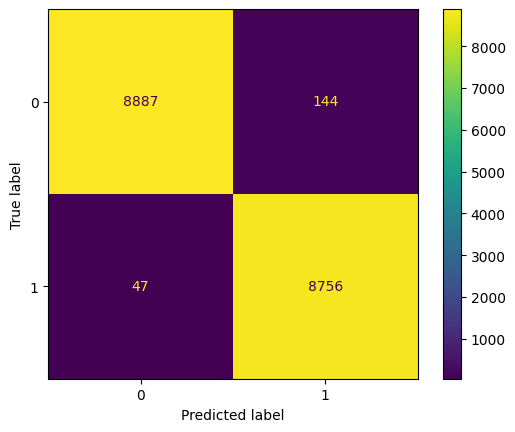

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('Group_14_Clean_Data.csv')
df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
tuned_parameters = [{
    'kernel': ['rbf'],
    'gamma': [1e-3, 1e-4],
    'C': [1, 10, 100, 1000]
    },
    {
    'kernel': ['linear'],
    'C': [1, 10, 100, 1000]
}]
svm_model = svm.SVC()
clf = GridSearchCV(svm_model, tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()